# Fire Detection

## Analyzing Single Image

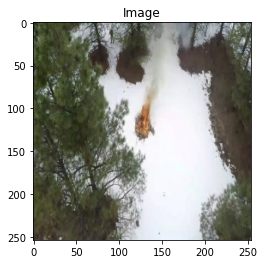

In [154]:
import pandas as pd
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("data/Training/Fire/resized_frame14.jpg")
plt.imshow(img)
plt.title("Image")
plt.show()

Plot the pixel histogram following: https://datacarpentry.org/image-processing/05-creating-histograms/ First in grayscale and then in every RGB channel to visualize the intensity and color distribution

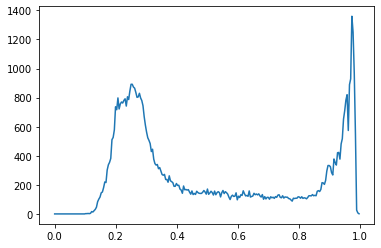

In [155]:
img_grey = color.rgb2gray(img)

histogram, bin_edges = np.histogram(img_grey, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)


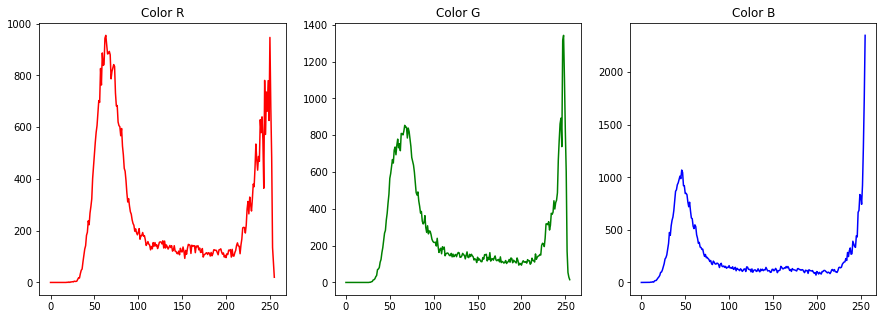

In [156]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

fig, axes = plt.subplots(1,3)

for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    axes[channel_id].plot(bin_edges[0:-1], histogram, color=c)
    axes[channel_id].title.set_text("Color {}".format(c.upper()))

fig.set_size_inches(15, 5)

## Analyzing the Training data set

First we analyze the Fire label.

In [157]:
train_fire_imgs = []

for i in range(30000): #30000
    try:
        train_fire_imgs.append(io.imread("data/Training/Fire/resized_frame{}.jpg".format(i)))
    except:
        # No image found
        pass


In [158]:
def calculate_average_img(imgs):
    avg_img = np.empty(imgs[0].shape, dtype=int)
    width = imgs[0].shape[0]
    height = imgs[0][0].shape[0]
    channels = imgs[0][0][0].shape[0]

    for i in range(width):
        for j in range(height):
            for c in range(channels):
                sum = 0
                for img in imgs:
                    sum += img[i][j][c]
                avg_img[i][j][c] = sum / len(imgs)
    
    return avg_img

Calculate the average image for the fire label.

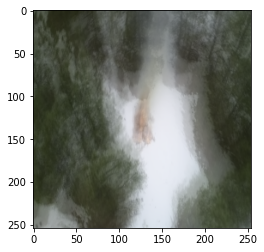

In [159]:
avg_img_fire_train = calculate_average_img(train_fire_imgs)
plt.imshow(avg_img)

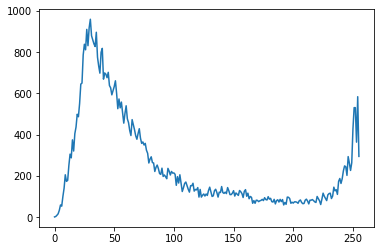

In [160]:
img_grey = color.rgb2gray(avg_img_fire_train)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

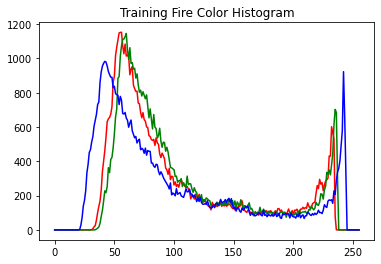

In [161]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_fire_train, bin_edges = np.histogram(
        avg_img_fire_train[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_fire_train, color=c)

plt.title("Training Fire Color Histogram")
fig.set_size_inches(15, 5)

Now we can analyze the no fire label.

In [162]:
train_nofire_imgs = []

for i in range(30000): #30000
    try:
        train_nofire_imgs.append(io.imread("data/Training/No_Fire/lake_resized_lake_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

for i in range(30000): #30000
    try:
        train_nofire_imgs.append(io.imread("data/Training/No_Fire/resized_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

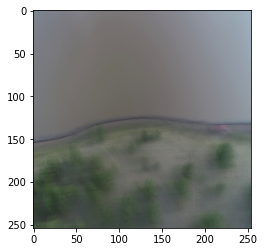

In [163]:
avg_img_nofire_train = calculate_average_img(train_nofire_imgs)
plt.imshow(avg_img_nofire)

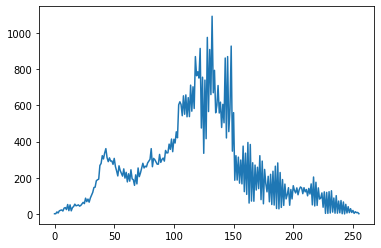

In [164]:
img_grey = color.rgb2gray(avg_img_nofire_train)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

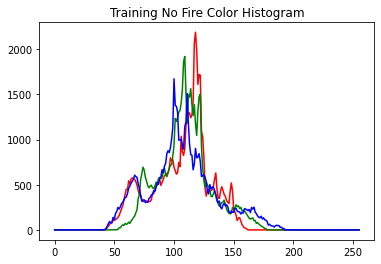

In [165]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_nofire_train, bin_edges = np.histogram(
        avg_img_nofire_train[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_nofire_train, color=c)

plt.title("Training No Fire Color Histogram")
fig.set_size_inches(15, 5)

## Analyzing the Test data set

First we analyze the fire label. Loading all images to memory.

In [211]:
test_fire_imgs = []

for i in range(30000): #30000
    try:
        test_fire_imgs.append(io.imread("data/Test/Fire/resized_test_fire_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

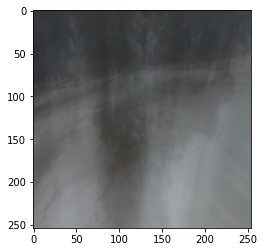

In [212]:
avg_img_fire_test = calculate_average_img(test_fire_imgs)
plt.imshow(avg_img_fire_test)

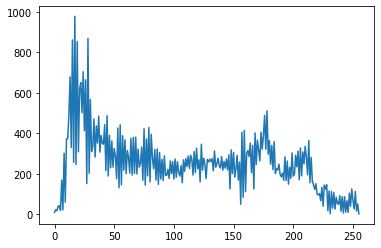

In [213]:
img_grey = color.rgb2gray(avg_img_fire_test)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

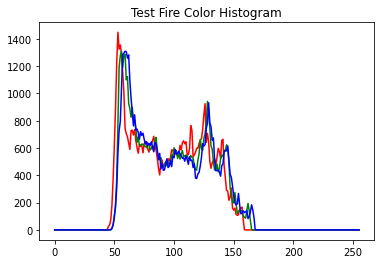

In [214]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_fire_test, bin_edges = np.histogram(
        avg_img_fire_test[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_fire_test, color=c)

plt.title("Test Fire Color Histogram")
fig.set_size_inches(15, 5)

Now we analyze te no fire label.

In [215]:
test_nofire_imgs = []

for i in range(30000): #30000
    try:
        test_nofire_imgs.append(io.imread("data/Test/No_Fire/resized_test_nofire_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

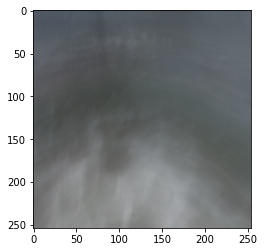

In [216]:
avg_img_nofire_test = calculate_average_img(test_nofire_imgs)
plt.imshow(avg_img_nofire_test)

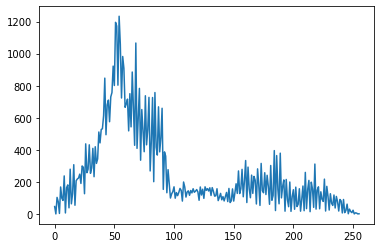

In [217]:
img_grey = color.rgb2gray(avg_img_nofire_test)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

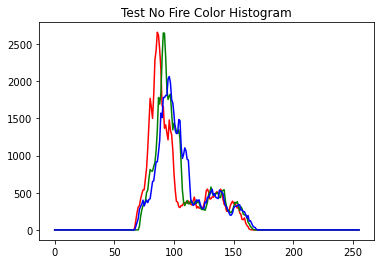

In [218]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_nofire_test, bin_edges = np.histogram(
        avg_img_nofire_test[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_nofire_test, color=c)

plt.title("Test No Fire Color Histogram")
fig.set_size_inches(15, 5)

## Summary of Data Exploration

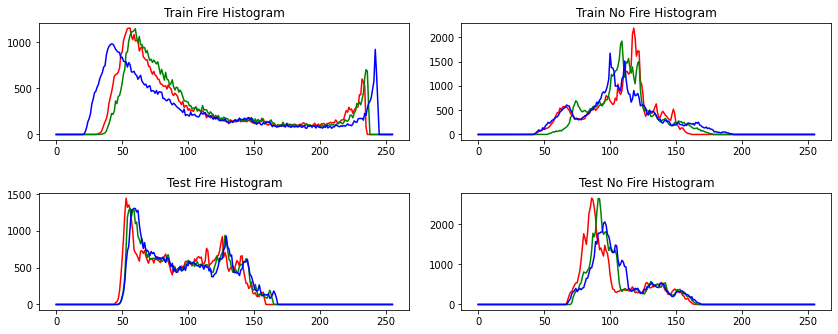

In [219]:
fig, axes = plt.subplots(2,2)
imgs = [
    ("Train Fire Histogram", avg_img_fire_train),
    ("Train No Fire Histogram", avg_img_nofire_train), 
    ("Test Fire Histogram", avg_img_fire_test),
    ("Test No Fire Histogram", avg_img_nofire_test)]

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

axes = axes.flatten()

for (ax, img) in zip(axes, imgs):
    for channel_id, c in zip(channel_ids, colors):
        hist, bin_edges = np.histogram(
            img[1][:, :, channel_id], bins=256, range=(0, 256)
        )
        ax.plot(bin_edges[0:-1], hist, color=c)
        ax.title.set_text(img[0])

fig.set_size_inches(12, 5)
fig.tight_layout(pad=2.0)